In [2]:
%matplotlib widget

import bagpy
from bagpy import bagreader

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
bag = bagreader("data/test1.bag")
bag.topic_table

[INFO]  Data folder data/test1 already exists. Not creating.


,Topics,Types,Message Count,Frequency
0,/diagnostics,diagnostic_msgs/DiagnosticArray,240,18.206420
1,/filter/quaternion,geometry_msgs/QuaternionStamped,16111,192.363970
2,/hokuyo0/parameter_descriptions,dynamic_reconfigure/ConfigDescription,1,NaN
3,/hokuyo0/parameter_updates,dynamic_reconfigure/Config,1,NaN
4,/hokuyo1/parameter_descriptions,dynamic_reconfigure/ConfigDescription,1,NaN
5,/hokuyo1/parameter_updates,dynamic_reconfigure/Config,1,NaN
6,/hokuyo2/parameter_descriptions,dynamic_reconfigure/ConfigDescription,1,NaN
7,/hokuyo2/parameter_updates,dynamic_reconfigure/Config,1,NaN
8,/image_view/parameter_descriptions,dynamic_reconfigure/ConfigDescription,1,NaN
9,/image_view/parameter_updates,dynamic_reconfigure/Config,1,NaN


In [4]:
accel_df = pd.read_csv(bag.message_by_topic('/imu/acceleration'))
accel_df.head(3)

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,vector.x,vector.y,vector.z
0,1.669803e+09,250,1669803320,423047544,imu_link,-1.434981,0.498791,9.674213
1,1.669803e+09,251,1669803320,428319850,imu_link,-1.426545,0.546572,9.681358
2,1.669803e+09,252,1669803320,432516182,imu_link,-1.436896,0.555246,9.700562


In [5]:
gyro_df = pd.read_csv(bag.message_by_topic('/imu/angular_velocity'))
gyro_df.head(3)

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,vector.x,vector.y,vector.z
0,1.669803e+09,250,1669803320,423047544,imu_link,0.003190,-0.004760,0.003020
1,1.669803e+09,251,1669803320,428319850,imu_link,-0.001221,-0.005975,-0.000975
2,1.669803e+09,252,1669803320,432516182,imu_link,0.001955,-0.001276,-0.003164


In [10]:
accel_df['time_diff'] = accel_df['header.stamp.secs'].diff(1)
accel_df['time_diff_ns'] = accel_df['header.stamp.nsecs'].diff(1) / 1e9
accel_df['velocity_x'] = accel_df['vector.x'].rolling(10).mean() * accel_df['time_diff_ns']
accel_df['velocity_y'] = accel_df['vector.y'] * accel_df['time_diff_ns']
accel_df['velocity_z'] = accel_df['vector.z'] * accel_df['time_diff_ns']
accel_df['position_x'] = accel_df['velocity_x'] * accel_df['time_diff_ns']
accel_df['position_y'] = accel_df['velocity_y'] * accel_df['time_diff_ns']
accel_df['position_z'] = accel_df['velocity_z'] * accel_df['time_diff_ns']

accel_df.dropna(inplace=True)
accel_df.head(20)

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,vector.x,vector.y,vector.z,time_diff,time_diff_ns,velocity_x,velocity_y,velocity_z,position_x,position_y,position_z
9,1.669803e+09,259,1669803320,467999850,imu_link,-1.420059,0.374481,9.708216,0.0,0.005266,-0.007695,0.001972,0.051127,-0.000041,0.000010,0.000269
10,1.669803e+09,260,1669803320,473348057,imu_link,-1.402955,0.381099,9.691341,0.0,0.005348,-0.007797,0.002038,0.051831,-0.000042,0.000011,0.000277
11,1.669803e+09,261,1669803320,477614563,imu_link,-1.423750,0.450801,9.646132,0.0,0.004267,-0.006219,0.001923,0.041155,-0.000027,0.000008,0.000176
12,1.669803e+09,262,1669803320,482844511,imu_link,-1.436446,0.461143,9.672075,0.0,0.005230,-0.007623,0.002412,0.050584,-0.000040,0.000013,0.000265
13,1.669803e+09,263,1669803320,488060029,imu_link,-1.459126,0.501945,9.657786,0.0,0.005216,-0.007605,0.002618,0.050370,-0.000040,0.000014,0.000263
14,1.669803e+09,264,1669803320,493307538,imu_link,-1.488951,0.549986,9.621745,0.0,0.005248,-0.007661,0.002886,0.050490,-0.000040,0.000015,0.000265
15,1.669803e+09,265,1669803320,497714351,imu_link,-1.508279,0.576571,9.619444,0.0,0.004407,-0.006441,0.002541,0.042391,-0.000028,0.000011,0.000187
16,1.669803e+09,266,1669803320,503067321,imu_link,-1.505828,0.550514,9.649866,0.0,0.005353,-0.007818,0.002947,0.051655,-0.000042,0.000016,0.000277
17,1.669803e+09,267,1669803320,507601493,imu_link,-1.477260,0.511750,9.603018,0.0,0.004534,-0.006612,0.002320,0.043542,-0.000030,0.000011,0.000197
18,1.669803e+09,268,1669803320,513017347,imu_link,-1.466256,0.482275,9.647545,0.0,0.005416,-0.007901,0.002612,0.052250,-0.000043,0.000014,0.000283


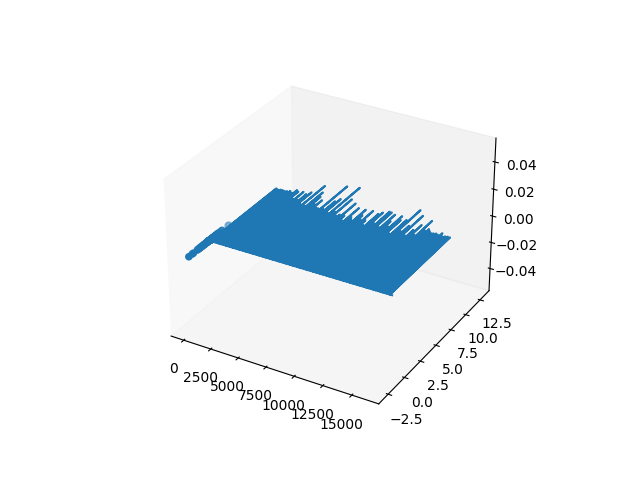

In [15]:
fig = plt.figure()
ax = plt.axes(projection='3d')
xdata = accel_df['position_x'].values
ydata = accel_df['position_y'].values
zdata = accel_df['position_z'].values

ax.scatter(xdata, ydata, zdata)
plt.show()

In [ ]:
accel_gyro = gyro_df[['vector.x', 'vector.y', 'vector.z']].to_numpy()
vec_gyro = gyro_df[['vector.x', 'vector.y', 'vector.z']].to_numpy()

In [36]:
accel_xyz = accel_df[['vector.x', 'vector.y', 'vector.z']].to_numpy()
accel_xyz[:10]

array([[-1.43498147,  0.49879113,  9.67421341],
       [-1.42654502,  0.54657209,  9.68135834],
       [-1.43689609,  0.55524594,  9.70056248],
       [-1.45425999,  0.5366205 ,  9.69897842],
       [-1.46988881,  0.52828288,  9.69377422],
       [-1.49144995,  0.52357602,  9.684062  ],
       [-1.51798546,  0.4511227 ,  9.69859982],
       [-1.49990058,  0.39298561,  9.68944836],
       [-1.45930851,  0.40049431,  9.68467617],
       [-1.42005944,  0.37448061,  9.70821571]])